In [2]:
import pathlib

import laspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import src.datasets

In [3]:
%load_ext autoreload
%autoreload 1

In [18]:
%aimport src.clouds
%aimport src.datasets
%aimport src.visualization.clouds

In [5]:
data_dir = pathlib.Path("../../data").resolve()

data_paths = {
    "lysva-raw": data_dir / "raw" / "lysva",
    "lysva-interim": data_dir / "interim" / "lysva",
    "trees": data_dir / "raw" / "trees",
}

lysva_als_files = sorted((data_paths["lysva-interim"] / "als").glob("*.las"))

In [6]:
dataset = src.datasets.SyntheticForestRGBMBFPatch(
    root="../../data/interim/synthetic_forest/",
    patch_width=12,
    patch_height=12,
    patch_overlap=0.75,
    force_reload=True,
    random_seed=42,
)

Processing...
Done!


<Axes3D: >

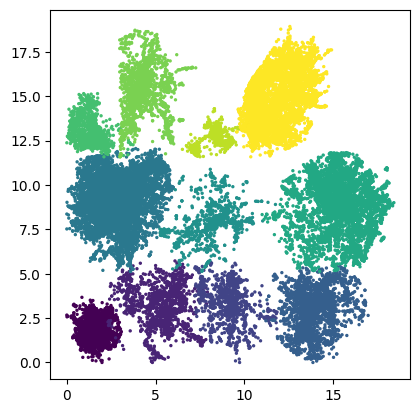

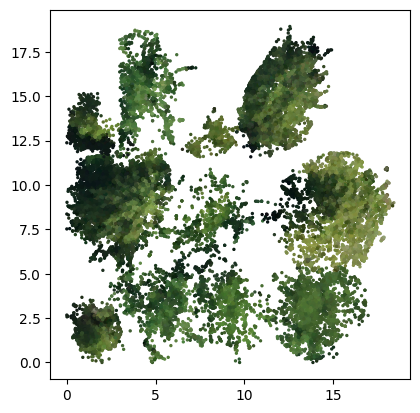

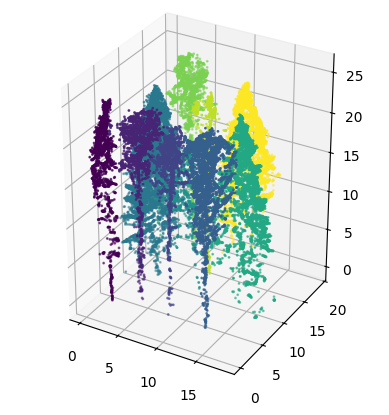

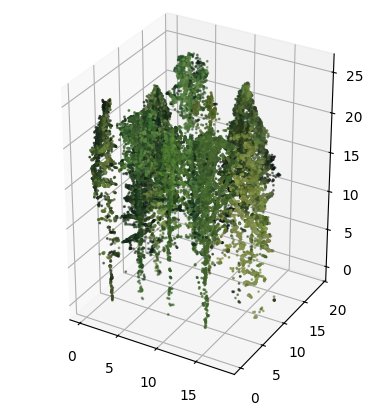

In [7]:
#| include: true
#| label: fig-synthetic-forest-patch-example-1
#| layout-ncol: 2
#| fig-cap: A 3D visualisation of the UAV LiDAR point cloud of plot 10.
#| fig-subcap:
#|   - abc
#|   - abc
#|   - abc
#|   - cde

example = dataset[1]
label = example.y.numpy()
rgb = example.x[:, 0:3].numpy() / 255

src.visualization.clouds.scatter_point_cloud_2d(
    xyz=example.pos.numpy(),
    projection="XY",
    sort_by_height=True,
    color=label,
)

src.visualization.clouds.scatter_point_cloud_2d(
    xyz=example.pos.numpy(),
    projection="XY",
    sort_by_height=True,
    color=rgb,
)

src.visualization.clouds.scatter_point_cloud_3d(
    xyz=example.pos.numpy(),
    color=label,
)

src.visualization.clouds.scatter_point_cloud_3d(
    xyz=example.pos.numpy(),
    color=rgb,
)

In [20]:
las = laspy.read(lysva_als_files[0])
xyz = las.xyz
color = np.stack([las.red, las.green, las.blue], axis=1)

height_mask = xyz[:, 2] >= 2
xyz, color = xyz[height_mask], color[height_mask]
xyz = src.clouds.recenter_cloud(xyz)

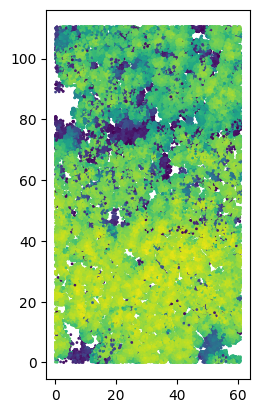

In [13]:
ax = src.visualization.clouds.scatter_point_cloud_2d(
    xyz,
    projection="XY",
    s=1,
)

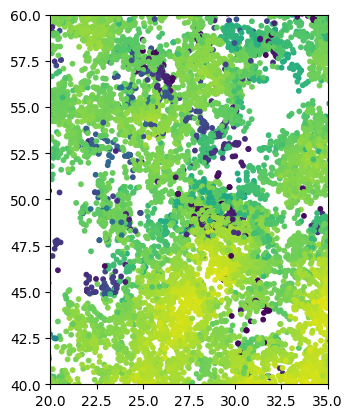

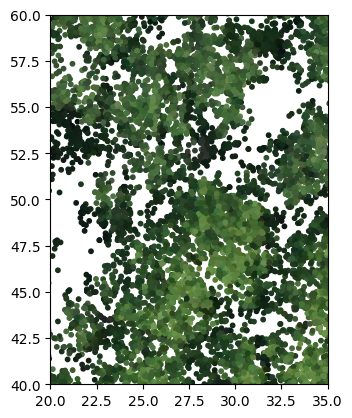

In [28]:
origin = (20, 40)
window = (15, 20)

ax = src.visualization.clouds.scatter_point_cloud_2d(
    xyz,
    projection="XY",
    s=10,
)
ax.set_xlim(origin[0], origin[0] + window[0])
ax.set_ylim(origin[1], origin[1] + window[1])
ax = src.visualization.clouds.scatter_point_cloud_2d(
    xyz,
    projection="XY",
    color=color / 255,
    s=10,
)
ax.set_xlim(origin[0], origin[0] + window[0])
ax.set_ylim(origin[1], origin[1] + window[1]);

In [31]:
window_mask = (
    (xyz[:, 0] >= origin[0])
    & (xyz[:, 0] < origin[0] + window[0])
    & (xyz[:, 1] >= origin[1])
    & (xyz[:, 1] < origin[1] + window[1])
)
window_mask.sum()

np.int64(9038)

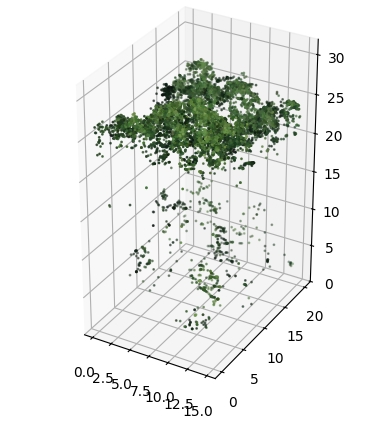

In [32]:
ax = src.visualization.clouds.scatter_point_cloud_3d(
    xyz[window_mask],
    color=color[window_mask] / 255,
)